Лабораторная работа по модулю “Препроцессинг данных”

1. Загрузить исходные данные data.csv
2. Провести первоначальный анализ предложенных данных
3. Предложить стратегию по работе с пропущенными значениями в данных
4. Предложить стратегию по работе с категориальными переменными
5. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)
6. Разбить данные на train/test
7. Решить задачу бинарной классификации и предсказать переменную ‘SalesCategory’ протестировав нескольких алгоритмов (Logistic Regression, Random Forest)
8. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
9. *Попробовать отобрать наиболее важные переменные (наибольшая корреляция или метод на ваш выбор)
10. *Сравнить результаты классификации при использовании изначального датасета и датасета с уменьшенной размерностью
11. Загрузить ipython notebook с результатами работы на github репозиторий

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('data.csv', sep=';')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SaleCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1


MSSubClass: Identifies the type of dwelling involved in the sale<br>
MSZoning: Identifies the general zoning classification of the sale<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access to property<br>
Alley: Type of alley access to property<br>
LotShape: General shape of property <br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to various conditions<br>
Condition2: Proximity to various conditions (if more than one is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Rates the overall material and finish of the house<br>
OverallCond: Rates the overall condition of the house<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Evaluates the quality of the material on the exterior<br>
ExterCond: Evaluates the present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Evaluates the height of the basement<br>
BsmtCond: Evaluates the general condition of the basement<br>
BsmtExposure: Refers to walkout or garden level walls<br>
BsmtFinType1: Rating of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Rating of basement finished area (if multiple types)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)<br>
Kitchen: Kitchens above grade<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality (Assume typical unless deductions are warranted)<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories section)<br>
MiscVal: Value of miscellaneous feature<br>
MoSold: Month Sold (MM)<br>
YrSold: Year Sold (YYYY)<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Колонки с нулевыми/отсутствующими значениями
col_nu=['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
        'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual',
        'GarageCond','PoolQC','Fence','MiscFeature']
len(col_nu)

19

В большинстве случаев, в столбцах, в которых есть nan/null значние NA указывает на отсутствие признака. Например, отсутствие гаража, подвала или бассейна. Эту информацию (отсутствие признака) можно использовать как фичу.

In [5]:
# Колонки, где nan = отсутствие
col_na=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2',
        'FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual', 'GarageCond',
        'PoolQC','Fence','MiscFeature']
# Колонки, где nan невыясненной природы
col_nan=['LotFrontage','MasVnrType','MasVnrArea','Electrical']
print(len(col_na),len(col_nan))

15 4


Заменим NA на значение, обозначающее отсутствие.

In [6]:
def na_to_no(df,cols):
    """
    NA to 'NoV' values in cols columns
    """
    df_out=df
    for each in cols:
        df_out[each].fillna('NoV',inplace=True)
    return df_out

In [7]:
df1=na_to_no(df,col_na)

Количество NA в столбце электричества и кирпичной облицовки мало по сравнению с общим числом. Заменим эти значения на моды этих величин.

In [8]:
df1['Electrical'].fillna(df1['Electrical'].mode()[0],inplace=True)
df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0],inplace=True)
df1['MasVnrArea'].fillna(df1['MasVnrArea'].mode()[0],inplace=True)

In [9]:
df1['LotFrontage'].fillna(round(df1['LotFrontage'].dropna().mean(),0),inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [11]:
# Колонки категориальных данных
col_cat=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
         'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
         'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType',
         'GarageFinish', 'PavedDrive', 
         'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
len(col_cat)

30

In [12]:
# Колонки с оценками
#1-5
col_eva1=['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
#0-5
col_eva2=['BsmtQual', 'BsmtCond',  'FireplaceQu', 'GarageQual', 'GarageCond']
#0-4
col_eva3=['BsmtExposure']
#0-6
col_eva4=['BsmtFinType1', 'BsmtFinType2']
#0,2-5
col_eva5=['PoolQC']
print(len(col_eva1),len(col_eva2),len(col_eva3),len(col_eva4),len(col_eva5))

4 5 1 2 1


In [13]:
dict_={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoV':0,'Av':3,'Mn':2,'No':1,'GLQ':6,
       'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}

In [14]:
df1.replace(dict_, inplace=True)

In [15]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleCategory
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,3.39589,3.083562,3.489041,2.934932,1.630137,3.545890,443.639726,1.247260,46.549315,567.240411,1057.429452,4.145205,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,0.613014,1.825342,1868.739726,1.767123,472.980137,2.810274,2.808904,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,0.017808,43.489041,6.321918,2007.815753,0.297945
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,0.57428,0.351054,0.876478,0.552159,1.067391,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,0.959501,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.644666,1.810877,453.697295,0.747315,213.804841,0.722898,0.719685,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.268952,496.123024,2.703626,1.328095,0.457512
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,795.750000,3.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,334.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,4.000000,3.000000,1.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,5.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1977.000000,2.000000,480.000000,3.000000,3.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,3.000000,4.000000,3.000000,2.000000,6.000000,712.250000,1.000000,0.000000,808.000000,1298.250000,5.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2001.00

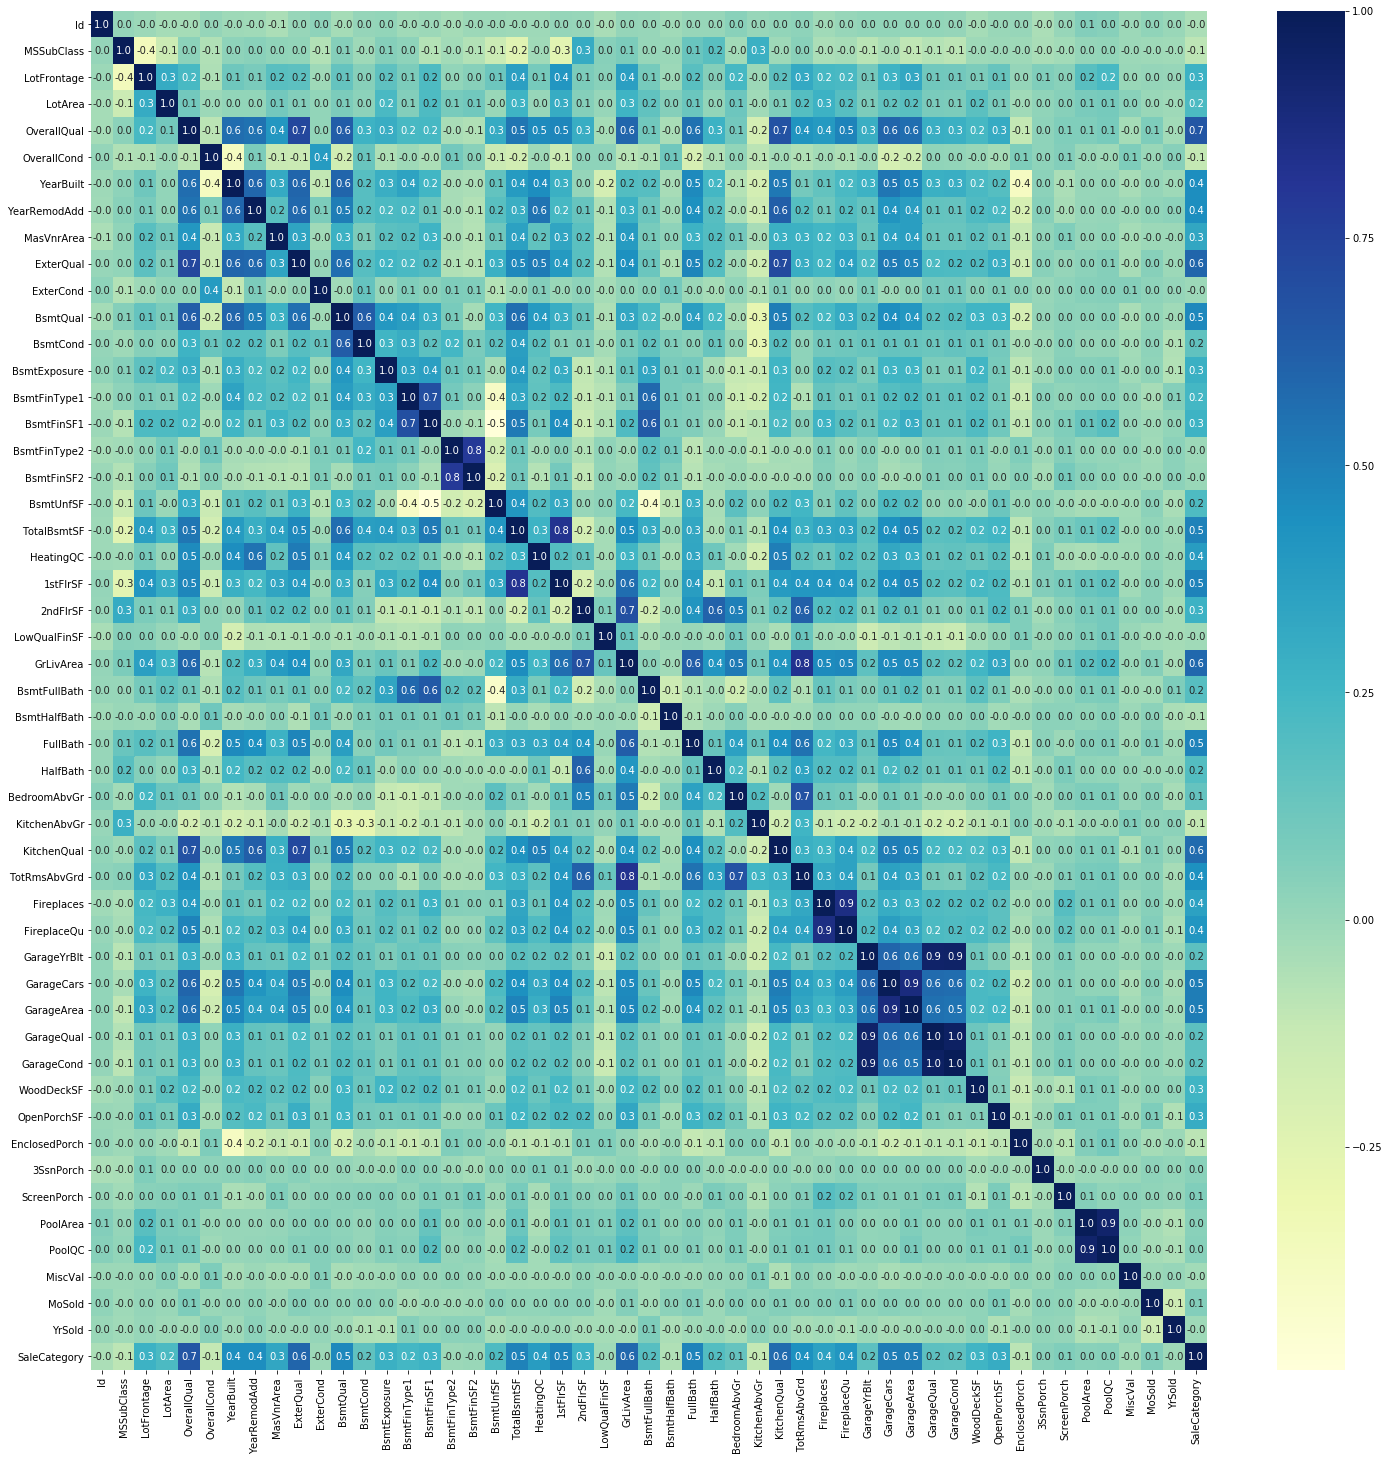

In [16]:
sns.heatmap(df1.corr(),annot=True,fmt='.1f',cmap="YlGnBu",xticklabels=True, yticklabels=True)
plt.gcf().set_size_inches(25,25)

- Некоторые параметры площадей коррелируют между собой.
- Качество и состояние различных частей дома коррелируют с общей оценкой, которая коррелирует с таргетом.

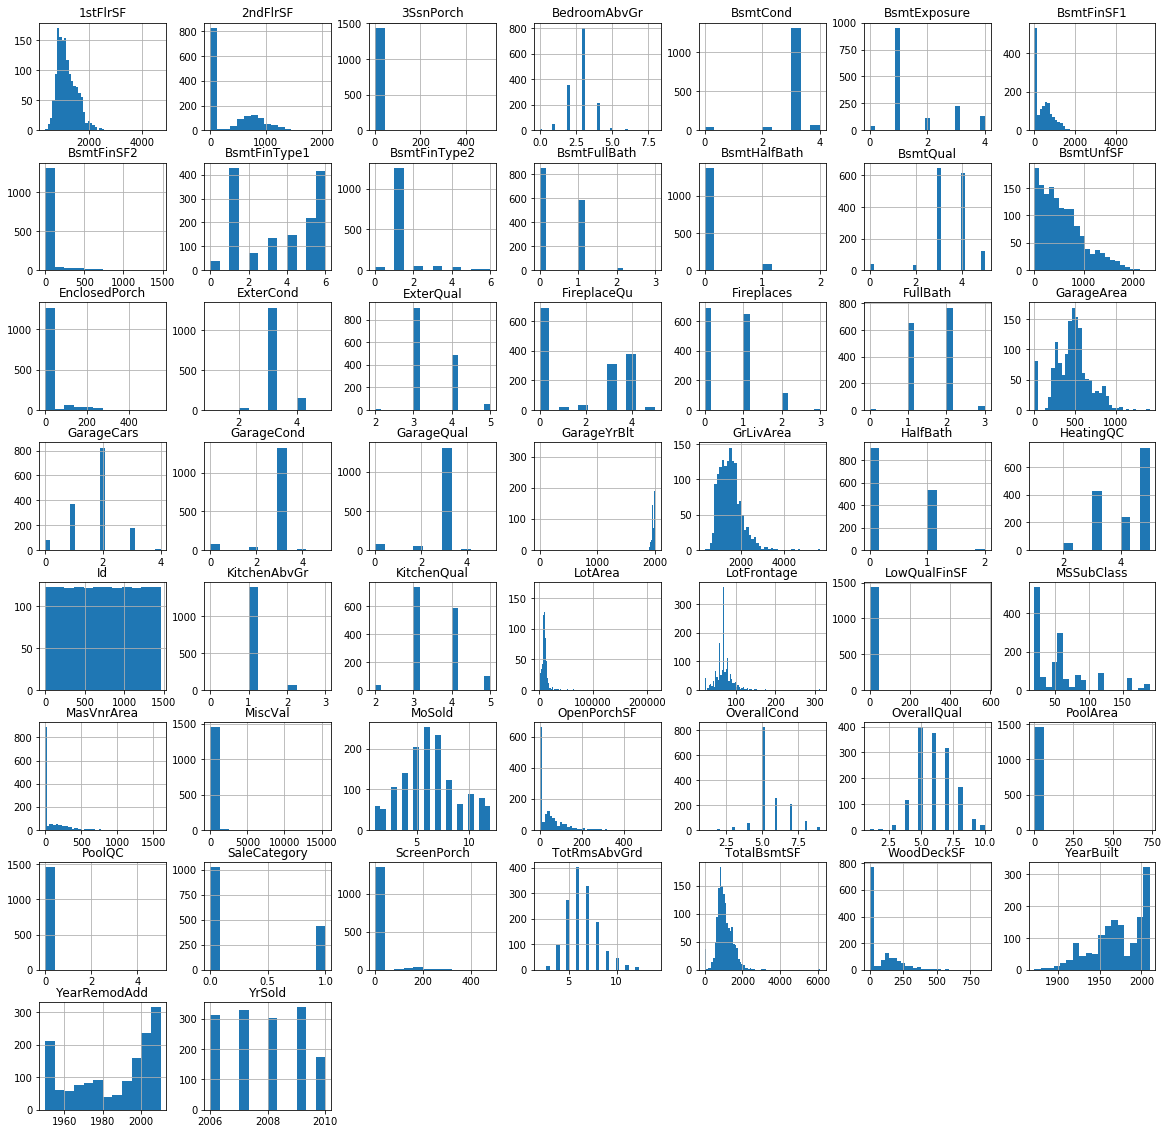

In [17]:
df1.hist(figsize=(20,20),bins='auto')
plt.show()

- В целом, распределение оценок качества комант неодинаково. Чаще всего много хороших оценок получают подвал, камин, нагрев, кухня. В общем-то, только гараж имеет обычную оценку - 3. Значит, состояние гаража не сильно влияет.
- Строительство домов происходило волнами (просто забавный факт)
- Чаще всего дома продают летом.

In [18]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [19]:
df1=get_one_hot(df1,col_cat)
df1 = df1.drop(labels=col_cat,axis=1)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 248 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(48), uint8(197)
memory usage: 862.7 KB


In [21]:
df1.corr().loc[:,'SaleCategory'].sort_values(ascending=False)[1:21]

OverallQual            0.658386
ExterQual              0.602048
GrLivArea              0.586293
KitchenQual            0.576516
GarageArea             0.512544
GarageCars             0.511790
TotalBsmtSF            0.492566
FullBath               0.490005
1stFlrSF               0.488095
BsmtQual               0.472205
Foundation_PConc       0.461946
YearRemodAdd           0.447166
YearBuilt              0.446685
TotRmsAbvGrd           0.438496
FireplaceQu            0.413621
HeatingQC              0.382271
Fireplaces             0.360984
Exterior2nd_VinylSd    0.339676
Exterior1st_VinylSd    0.333975
MasVnrArea             0.330140
Name: SaleCategory, dtype: float64

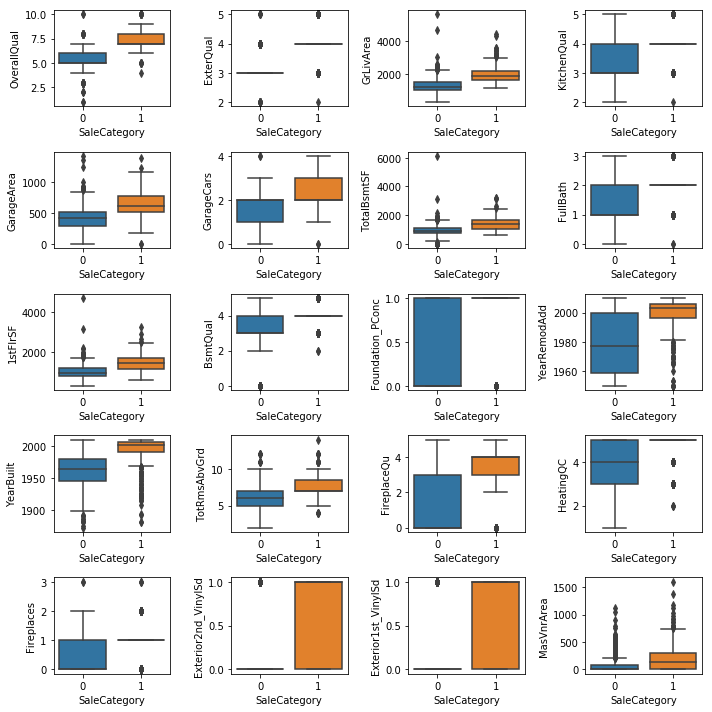

In [22]:
cor_col=df1.corr().loc[:,'SaleCategory'].sort_values(ascending=False)[1:21].index
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))
for i, feat in enumerate(cor_col): 
    ax = axes[int(i/4),i%4] 
    sns.boxplot(x='SaleCategory', y=feat, data=df1, ax=ax) 
    ax.set_xlabel('SaleCategory') 
    ax.set_ylabel(feat) 
fig.tight_layout()

In [24]:
all_corr_col = []
for col in set(df1.columns):
    if abs(scipy.stats.pointbiserialr(df1['SaleCategory'], df1[col])[0]) >=0.05:
        all_corr_col.append(col)

In [25]:
all_corr_col

['HouseStyle_SFoyer',
 'Functional_Min1',
 'Alley_Grvl',
 'Neighborhood_BrkSide',
 'Neighborhood_Somerst',
 'Exterior1st_Wd Sdng',
 'Electrical_SBrkr',
 'SaleCategory',
 'Neighborhood_Crawfor',
 'HouseStyle_1.5Fin',
 'MasVnrType_BrkFace',
 'Neighborhood_NoRidge',
 'MSZoning_FV',
 'CentralAir_Y',
 'SaleType_WD',
 'LotArea',
 'LandContour_Bnk',
 'HalfBath',
 'LotShape_IR2',
 'HeatingQC',
 'GarageYrBlt',
 'MasVnrType_BrkCmn',
 'MasVnrType_None',
 'KitchenQual',
 'Exterior1st_AsbShng',
 'BsmtQual',
 'Electrical_FuseF',
 'MiscFeature_0',
 'BldgType_1Fam',
 'Functional_Typ',
 'BsmtCond',
 'Exterior1st_MetalSd',
 'SaleType_Con',
 'GarageFinish_0',
 'OverallQual',
 'ScreenPorch',
 'ExterQual',
 'Neighborhood_CollgCr',
 'Neighborhood_Sawyer',
 'Neighborhood_MeadowV',
 'MSSubClass',
 'Fence_0',
 'Foundation_Slab',
 'OpenPorchSF',
 'RoofStyle_Gable',
 'Exterior2nd_MetalSd',
 'Condition1_Artery',
 'SaleCondition_Abnorml',
 'WoodDeckSF',
 'Condition1_RRAe',
 'MoSold',
 'GarageCond',
 'GarageType_Ca

In [42]:
y=df1['SaleCategory']
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3, random_state=42)
X_train.drop(columns=['SaleCategory'], inplace=True)
X_test.drop(columns=['SaleCategory'], inplace=True)

In [49]:
clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0).fit(X_train, y_train)
y_train_predict = np.round(clf.predict_proba(X_train)[:, 1],0)
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       712
           1       0.99      1.00      1.00       310

   micro avg       1.00      1.00      1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022

Accuracy: 0.9980430528375733


¯\_(ツ)_/¯ Странно

In [50]:
lgr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_train_predict = np.round(lgr.predict_proba(X_train)[:, 1],0)
print(classification_report(y_train, y_train_predict))
print('Accuracy:',accuracy_score(y_train, y_train_predict))

/anaconda3/envs/dvp/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       712
           1       0.93      0.92      0.92       310

   micro avg       0.95      0.95      0.95      1022
   macro avg       0.95      0.94      0.94      1022
weighted avg       0.95      0.95      0.95      1022

Accuracy: 0.9530332681017613
